# Filtros IIR. Aproximación Butterworth

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [2]:
n = 3.
#k = np.arange(2*n)
k = np.arange(1,2*n+1)
d = 1j*np.pi/(2*n)
s = np.exp( d*(2*k + n - 1 ) )

print d, '\n', s, '\n', k, '\n'

0.523598775598j 
[-0.5 +8.66025404e-01j -1.0 +1.22464680e-16j -0.5 -8.66025404e-01j
  0.5 -8.66025404e-01j  1.0 -2.44929360e-16j  0.5 +8.66025404e-01j] 
[ 1.  2.  3.  4.  5.  6.] 



In [3]:
print np.real( s[0] ), np.imag( s[0] )

-0.5 0.866025403784


[-0.5 -1.  -0.5  0.5  1.   0.5] [  8.66025404e-01   1.22464680e-16  -8.66025404e-01  -8.66025404e-01
  -2.44929360e-16   8.66025404e-01]


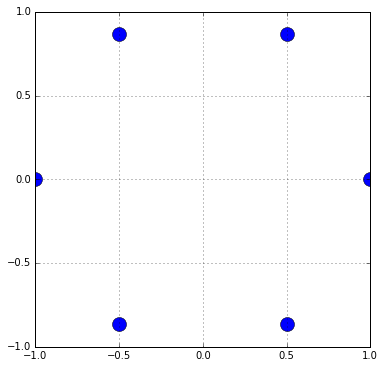

In [4]:
re, im = np.real( s ), np.imag( s )

print re, im

plt.figure(figsize=(6,6))
plt.plot(re,im,'o',markersize=14)
plt.grid(True)
plt.show()

In [5]:
ss  = d*(2*k + n - 1 )
s   = np.imag(ss)
print ss, '\n', s


[ 0.+2.0943951j   0.+3.14159265j  0.+4.1887902j   0.+5.23598776j
  0.+6.28318531j  0.+7.33038286j] 
[ 2.0943951   3.14159265  4.1887902   5.23598776  6.28318531  7.33038286]


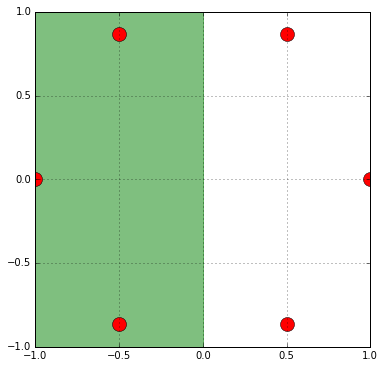

In [6]:
re = np.cos ( s )
im = np.sin ( s )

plt.figure(figsize=(6,6))
plt.plot(re,im,'or',markersize=14)
plt.grid(True)
plt.axvspan(-1,0,color='g',alpha=.5)
plt.show()

In [7]:
print ', '.join( ['%2.3f'%i for i in re] )
print ', '.join( ['%2.3f'%i for i in im] )

-0.500, -1.000, -0.500, 0.500, 1.000, 0.500
0.866, 0.000, -0.866, -0.866, -0.000, 0.866


In [8]:
print re[ :int(n)/2 ]
print im[ :int(n)/2 ]

[-0.5]
[ 0.8660254]


In [9]:
wo  = re[ :int(n)/2 ]**2 + im[ :int(n)/2 ]**2
eps = np.abs( 2*re[ :int(n)/2 ] )

print wo
print eps


[ 1.]
[ 1.]


In [10]:
p = np.array(  [ np.ones( eps.shape[0] ), eps, wo ]  ).T

print p

[[ 1.  1.  1.]]


In [11]:
x = np.poly1d( p[0] )
for i in p[1:]:
    x *= np.poly1d( i )

print x

   2
1 x + 1 x + 1


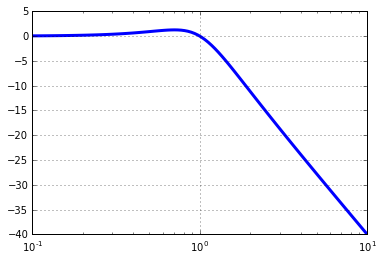

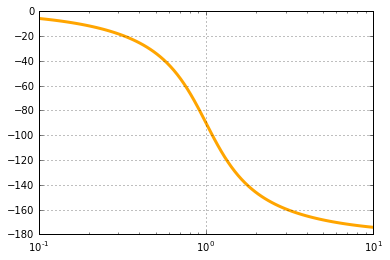

In [12]:
sy = signal.lti([1], x)

w, mag, phase = signal.bode(sy)

plt.figure()
plt.semilogx(w, mag,linewidth=3)
plt.grid(True)

plt.figure()
plt.semilogx(w, phase, linewidth=3, color='orange')
plt.grid(True)
plt.show()